<class 'numpy.ndarray'>


<Axes: >

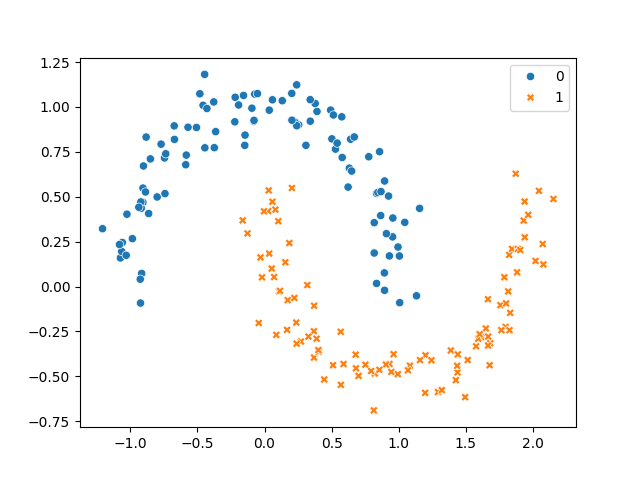

In [1]:
%matplotlib widget
import numpy as np
import torch
import torch.nn as nn
import seaborn as sns
from matplotlib import cm
from torch.utils.data import DataLoader, Dataset
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt
from tqdm import tqdm
import time


X,y = make_moons(n_samples=200,noise=0.1)
print(type(X))
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,style=y)

In [2]:
model=nn.Linear(2,2)
loss_func=nn.CrossEntropyLoss()
nEpochs=30
loss_acum=0
optimizer=torch.optim.SGD(model.parameters(),lr=0.001)
dataset=torch.utils.data.TensorDataset(
    torch.tensor(X,dtype=torch.float32),
    torch.tensor(y,dtype=torch.float32))
dataloader=DataLoader(dataset,batch_size=1,shuffle=True)

for epoch in tqdm(range(nEpochs),desc="Train Batch"):
    model.train()
    running_loss=0
    for inputs,labels in tqdm(dataloader,desc="Batch",leave=False):
        #print(f"{inputs}=>{labels}")
        optimizer.zero_grad()
        y_hat=model(inputs)
        loss=loss_func(y_hat,labels)
        loss.backward()
        optimizer.step()
       






Train Batch:   0%|          | 0/30 [00:00<?, ?it/s]


RuntimeError: expected scalar type Long but found Float

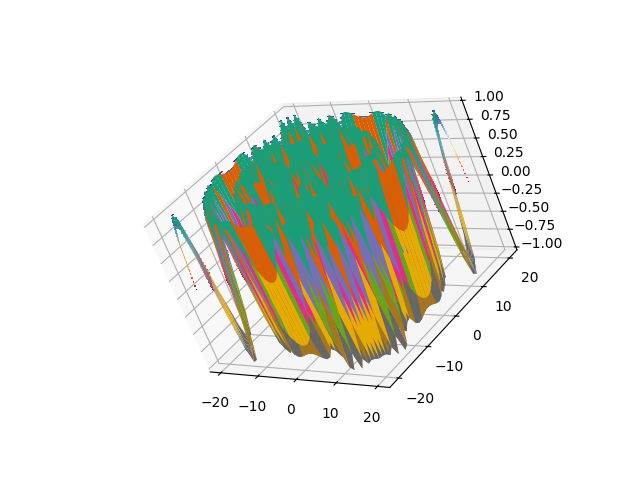

In [12]:

xv,yv = np.meshgrid(np.linspace(-2,2,40),np.linspace(-2,2,40))
xy=np.hstack((xv.reshape(-1,1),yv.reshape(-1,1)))

R=np.sin(np.sqrt(xv**2+yv**2))

plt.contourf(xv,yv,R,levels=np.linspace(0,1,20),cmap=plt.cm.RdYlBu)
plt.show()
#sns.scatterplot(x=X[:,0],y=X[:,1],hue=y,style=y,ax=plt.gca())
#fig,ax=plt.subplots(subplot_kw={"projection":"3d"})
#ax.plot_surface(xv,yv,R,cmap=cm.Dark2_r)